In [104]:
#import modules
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.patches as mpatches
%matplotlib inline

In [105]:
#load data TMB MODEL
model=np.loadtxt('alpha-models')

In [106]:
#distinguishing between different[alpha/iron];  with age>1Gyr and Hbeta<5
alpha00=[]
alpha03=[]
alpha05=[]
for i in range(model.shape[0]):
    if model[i,2]==0 and model[i,0]>=4 and model[i,0]<13 and model[i,15]<5:
        alpha00.append(model[i,:])
    if model[i,2]==0.3 and model[i,0]>=2 and model[i,0]<13 and model[i,15]<5:
        alpha03.append(model[i,:])
    if model[i,2]==0.5 and model[i,0]>=2  and model[i,0]<13  and model[i,15]<5:
        alpha05.append(model[i,:])
alpha00=np.array(alpha00)
alpha03=np.array(alpha03)
alpha05=np.array(alpha05)

In [107]:
#definition  of new "index"
def MgFe(Mgb,  Fe5270, Fe5335):
    MgFe=np.sqrt(Mgb*(0.72*Fe5270+0.28*Fe5335))
    return MgFe

hb_00=alpha00[:,15]
Mgb_00=alpha00[:,19]
Fe5270_00=alpha00[:,20]
Fe5335_00=alpha00[:,21]

MgFe_00=MgFe(Mgb_00, Fe5270_00, Fe5335_00)

hb_03=alpha03[:,15]
Mgb_03=alpha03[:,19]
Fe5270_03=alpha03[:,20]
Fe5335_03=alpha03[:,21]

MgFe_03=MgFe(Mgb_03, Fe5270_03, Fe5335_03)

hb_05=alpha05[:,15]
Mgb_05=alpha05[:,19]
Fe5270_05=alpha05[:,20]
Fe5335_05=alpha05[:,21]

MgFe_05=MgFe(Mgb_05, Fe5270_05, Fe5335_05)

[-2.25, -1.35, -0.33, 0.0, 0.35, 0.67]
[4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]


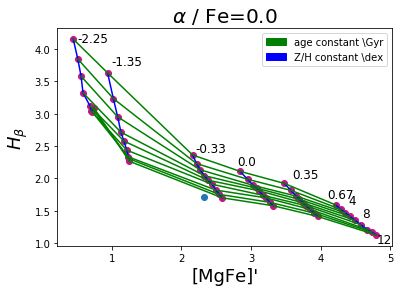

In [108]:
#age-[Z/H] model  grid  from the TMB  model at [alpha/Fe]=0
plt.scatter(MgFe_00,hb_00,color='mediumvioletred')
plt.xlabel("[MgFe]'",fontsize=18)
plt.ylabel(r'$H_{\beta}$',fontsize=18)
plt.title(r'${\alpha}$ / Fe=0.0',fontsize=20)
#plot lines representing constant metallicity and age
ZH00=alpha00[:,1]
ZH00par=[]
Year00=alpha00[:,0]
Year00par=[]
for value in np.unique(ZH00):
    mask=ZH00==value
    ZH00par.append(value)
    plt.plot(MgFe_00[mask],hb_00[mask],color='blue')
for value in np.unique(Year00):
    mask=Year00==value
    Year00par.append(value)
    plt.plot(MgFe_00[mask],hb_00[mask],color='green')
    
print(ZH00par)
print(Year00par)
#final values from scale.py of VCC1407_M21
#(HINDEX,MgINDEX,Fe5270INDEX,Fe5335INDEX)=(1.7108503714616412, 2.74202605338889, 2.0191738473455403, 1.4068659164397377)
#(Hb,MgFe,MeanFe)= 1.7108503714616412, 2.250892554511577, 1.713019881892639)

#(HINDEX,MgINDEX,Fe5270INDEX,Fe5335INDEX)=1.7192619101107103, 2.7876367154614323, 2.09455962998355, 1.5251356625791754)
#(Hb,MgFe,MeanFe)=(1.7192619101107103, 2.3225878073755175, 1.8098476462813626)

#which means it has not changed  much

plt.plot(2.3225878073755175,1.719261910110710 ,'o')

plt.text(0.5,4.1, -2.25, fontsize=12)
plt.text(1,3.75,-1.35,fontsize=12)
plt.text(2.2,2.4,-0.33, fontsize=12)
plt.text(2.8,2.2,0.00,fontsize=12)
plt.text(3.6,2,0.35,fontsize=12)
plt.text(4.1,1.7,0.67,fontsize=12)
plt.text(4.4,1.6,4,fontsize=12)
plt.text(4.6,1.4,8,fontsize=12)
plt.text(4.8,1,12,fontsize=12)

green_patch=mpatches.Patch(color='green',label="age constant \Gyr")
blue_patch=mpatches.Patch(color='blue',label="Z/H constant \dex")
plt.legend(handles=[green_patch,blue_patch])

plt.savefig('alpha00')
plt.show()


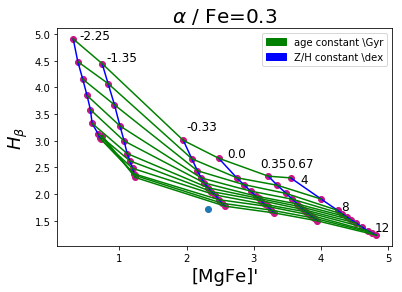

In [109]:
#age-[Z/H] model  grid  from the TMB  model at [alpha/Fe]=0.3
plt.scatter(MgFe_03,hb_03,color='mediumvioletred')
plt.xlabel("[MgFe]'",fontsize=18)
plt.ylabel(r'$H_{\beta}$',fontsize=18)
plt.title(r'${\alpha}$ / Fe=0.3',fontsize=20)
#plot lines representing constant metallicity and age
ZH03=alpha03[:,1]
Year03=alpha03[:,0]
for value in np.unique(ZH03):
    mask=ZH03==value
    plt.plot(MgFe_03[mask],hb_03[mask],color='blue')
for value in np.unique(Year03):
    mask=Year03==value
    plt.plot(MgFe_03[mask],hb_03[mask],color='green')
    
#final values from scale.py of VCC1407_M21
#(HINDEX,MgINDEX,Fe5270INDEX,Fe5335INDEX)=(1.7108503714616412, 2.74202605338889, 2.0191738473455403, 1.4068659164397377)
#(Hb,MgFe,MeanFe)= 1.7108503714616412, 2.250892554511577, 1.713019881892639)

#(HINDEX,MgINDEX,Fe5270INDEX,Fe5335INDEX)=1.7192619101107103, 2.7876367154614323, 2.09455962998355, 1.5251356625791754)
#(Hb,MgFe,MeanFe)=(1.7192619101107103, 2.3225878073755175, 1.8098476462813626)

#which means it has not changed  much

plt.plot(2.3225878073755175,1.719261910110710,'o')

plt.text(0.4,4.9, -2.25, fontsize=12)
plt.text(0.8,4.5,-1.35,fontsize=12)
plt.text(2,3.2,-0.33, fontsize=12)
plt.text(2.6,2.7,0.00,fontsize=12)
plt.text(3.1,2.5,0.35,fontsize=12)
plt.text(3.5,2.5,0.67,fontsize=12)
plt.text(3.7,2.2,4,fontsize=12)
plt.text(4.3,1.7,8,fontsize=12)
plt.text(4.8,1.3,12,fontsize=12)

green_patch=mpatches.Patch(color='green',label="age constant \Gyr")
blue_patch=mpatches.Patch(color='blue',label="Z/H constant \dex")
plt.legend(handles=[green_patch,blue_patch])

plt.savefig('alpha03')
plt.show()


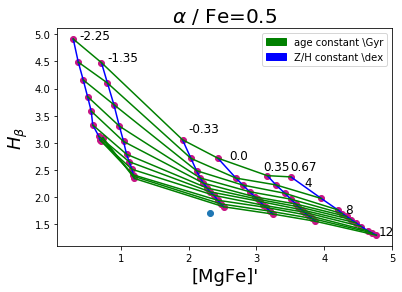

In [110]:
#age-[Z/H] model  grid  from the TMB  model at [alpha/Fe]=0.5
plt.scatter(MgFe_05,hb_05,color='mediumvioletred')
plt.xlabel("[MgFe]'",fontsize=18)
plt.ylabel(r'$H_{\beta}$',fontsize=18)
plt.title(r'${\alpha}$ / Fe=0.5',fontsize=20)
#plot lines representing constant metallicity and age
ZH05=alpha05[:,1]
Year05=alpha05[:,0]
for value in np.unique(ZH05):
    mask=ZH05==value
    plt.plot(MgFe_05[mask],hb_05[mask],color='blue')
for value in np.unique(Year05):
    mask=Year05==value
    plt.plot(MgFe_05[mask],hb_05[mask],color='green')
    
#final values from scale.py of VCC1407_M21
#(HINDEX,MgINDEX,Fe5270INDEX,Fe5335INDEX)=(1.7108503714616412, 2.74202605338889, 2.0191738473455403, 1.4068659164397377)
#(Hb,MgFe,MeanFe)= 1.7108503714616412, 2.250892554511577, 1.713019881892639)

#(HINDEX,MgINDEX,Fe5270INDEX,Fe5335INDEX)=1.7192619101107103, 2.7876367154614323, 2.09455962998355, 1.5251356625791754)
#(Hb,MgFe,MeanFe)=(1.7192619101107103, 2.3225878073755175, 1.8098476462813626)

#which means it has not changed  much

plt.plot(2.3225878073755175,1.719261910110710 ,'o')

plt.text(0.4,4.9, -2.25, fontsize=12)
plt.text(0.8,4.5,-1.35,fontsize=12)
plt.text(2,3.2,-0.33, fontsize=12)
plt.text(2.6,2.7,0.00,fontsize=12)
plt.text(3.1,2.5,0.35,fontsize=12)
plt.text(3.5,2.5,0.67,fontsize=12)
plt.text(3.7,2.2,4,fontsize=12)
plt.text(4.3,1.7,8,fontsize=12)
plt.text(4.8,1.3,12,fontsize=12)

green_patch=mpatches.Patch(color='green',label="age constant \Gyr")
blue_patch=mpatches.Patch(color='blue',label="Z/H constant \dex")
plt.legend(handles=[green_patch,blue_patch])

plt.savefig('alpha05.png')
plt.show()
